In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'D:/suicide_dash_app_2022/assets/processed_data/output.csv'
df = pd.read_csv(url, index_col = 'year', parse_dates=True, infer_datetime_format=True)
df = df.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)
df.head(5)

,country,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,generation,...,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code,mobilesubscription
year,,,,,,,,,,,,,,,,,,,,,
1985-01-01,Argentina,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,G.I. Generation,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Americas,ARG,0.0
1985-01-01,Belgium,female,35-54 years,252,1216200,20.72,Belgium1985,8.673004e+10,9356,Silent,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Europe,BEL,0.0
1985-01-01,Belgium,male,15-24 years,109,775300,14.06,Belgium1985,8.673004e+10,9356,Generation X,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Europe,BEL,0.0
1985-01-01,Belgium,female,25-34 years,78,744000,10.48,Belgium1985,8.673004e+10,9356,Boomers,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Europe,BEL,0.0
1985-01-01,Belgium,female,15-24 years,33,744100,4.43,Belgium1985,8.673004e+10,9356,Generation X,...,1.817658,1.077831e+07,50.156848,44.867006,10732.386792,2.157578,64.426681,Europe,BEL,0.0


In [3]:
df.columns

Index(['country', 'sex', 'age', 'suicides', 'population', 'sucid_in_hundredk',
       'country-year', 'yearly_gdp', 'gdp_per_capita', 'generation',
       'suicide%', 'internetusers', 'expenses', 'employeecompensation',
       'unemployment', 'physician_price', 'laborforcetotal', 'lifeexpectancy',
       'mobilesubscriptions', 'refugees', 'selfemployed', 'electricityacess',
       'continent', 'country_code', 'mobilesubscription'],
      dtype='object')

In [4]:
ndf = df.groupby(['year','country']).agg(sucid_in_hundredk = ('sucid_in_hundredk','sum'),
     suicides = ('suicides','sum'),
     internetusers = ('internetusers','sum'),
     ).reset_index()

In [5]:
shape=ndf.shape
print("Dataset contains {} rows and {} columns".format(shape[0],shape[1]))

Dataset contains 1108 rows and 5 columns


In [6]:
ndf.head(3)

,year,country,sucid_in_hundredk,suicides,internetusers
0,1985-01-01,Argentina,134.47,1988,282.551849
1,1985-01-01,Australia,163.41,1861,282.551849
2,1985-01-01,Austria,384.81,2091,282.551849


In [7]:
ndf.columns

Index(['year', 'country', 'sucid_in_hundredk', 'suicides', 'internetusers'], dtype='object')

In [8]:
#Statistical Details of the dataset
ndf.describe()

,sucid_in_hundredk,suicides,internetusers
count,1108.000000,1108.000000,1108.000000
mean,171.845262,4336.170578,379.880930
std,98.749953,8252.929131,299.446099
min,4.950000,22.000000,0.001100
25%,107.575000,683.000000,214.054205
50%,152.570000,1691.500000,282.551849
75%,226.702500,3742.250000,531.360000
max,575.000000,61420.000000,1158.561600


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:

X_var = ndf[['suicides']] # independent variable
y_var = ndf['internetusers'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.20, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:

# !pip install termcolor
import statsmodels.api as sm
from termcolor import colored as cl

slr_model = sm.OLS(y_var, X_var) # Ordinary Least Squares 
slr_reg = slr_model.fit()

In [12]:
slr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          internetusers   R-squared (uncentered):                   0.108
Model:                            OLS   Adj. R-squared (uncentered):              0.107
Method:                 Least Squares   F-statistic:                              134.4
Date:                Sun, 11 Sep 2022   Prob (F-statistic):                    2.04e-29
Time:                        15:10:22   Log-Likelihood:                         -8357.6
No. Observations:                1108   AIC:                                  1.672e+04
Df Residuals:                    1107   BIC:                                  1.672e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
suicides       0.0171      0.001     11.594      0.000       0.014       0.020
==============================================================================
Omnibus:                       37.539   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.122
Skew:                           0.234   Prob(JB):                     5.93e-16
Kurtosis:                       4.140   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.20, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)
yhat

array([321.70024709, 307.8157429 , 383.64205146, 385.51748392,
       382.24467041, 384.09383631, 384.40640838, 377.15421087,
       385.60679023, 236.9590677 , 379.88855988, 374.88740665,
       374.42248851, 380.44803763, 372.91741456, 380.11707896,
       380.43490435, 384.32498205, 385.40453771, 384.13586281,
       371.07875529, 385.56213707, 384.02554325, 380.39025119,
       384.42479498, 377.1043044 , 382.75686835, 382.96174752,
       373.17745352, 378.41237914, 381.05216853, 384.34862195,
       376.67090614, 385.58052367, 381.97937814, 346.53265395,
       376.87841198, 384.70322052, 360.83216981, 360.96350261,
       374.45138173, 316.49684134, 370.29863842, 382.52309595,
       382.06343114, 382.66230873, 381.59325969, 382.44692293,
       380.00150609, 380.77111633, 375.84876278, 385.48333739,
       303.94930511, 356.32220127, 381.05742185, 381.44091364,
       381.45930023, 380.55310387, 380.01463937, 356.37736104,
       370.19094552, 383.2506797 , 382.03191126, 369.45

In [14]:
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

R-Squared : -0.005513038312354279


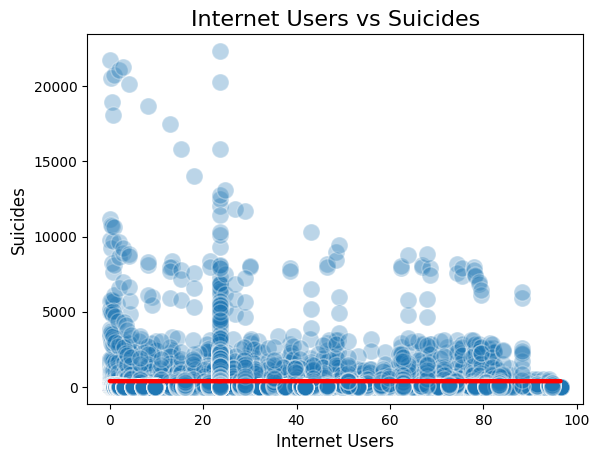

In [15]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_
import seaborn as sb
sb.scatterplot(x = 'internetusers', y = 'suicides', data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['internetusers'], slr_slope*df['internetusers'] + slr_intercept, color = 'r', linewidth = 3)

plt.title('Internet Users vs Suicides', fontsize = 16)
plt.ylabel('Suicides', fontsize = 12)
plt.xlabel('Internet Users', fontsize = 12)

In [16]:
ndf.columns

Index(['year', 'country', 'sucid_in_hundredk', 'suicides', 'internetusers'], dtype='object')

In [17]:
X1_var = ndf[['year', 'country', 'internetusers']]
y_var = ndf['suicides'] # dependent variable

In [18]:
sm_X1_var = sm.add_constant(X1_var)
sm_X1_var = pd.get_dummies(sm_X1_var, columns=['year', 'country', 'internetusers'], drop_first = True)
mlr_model = sm.OLS(y_var, sm_X1_var)
mlr_reg = mlr_model.fit()

In [19]:
print(cl(mlr_reg.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:               suicides   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     23.61
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          1.30e-149
Time:                        15:10:26   Log-Likelihood:                -9337.6
No. Observations:                1108   AIC:                         2.022e+04
Df Residuals:                     334   BIC:                         2.410e+04
Df Model:                         773                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

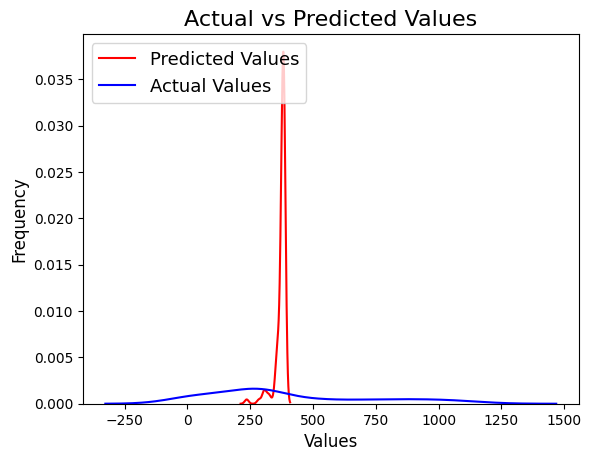

In [20]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [21]:
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

R-Squared : -0.005513038312354279
